In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

In [2]:
bigdata = pd.read_csv("../data/imbalance_1h.csv")

In [3]:
bigdata.head()

,datetime,1,2,weekday,date
0,2013-12-31 23:00:00,917.118,92.620,1,2013-12-31
1,2014-01-01 00:00:00,1264.266,82.465,2,2014-01-01
2,2014-01-01 01:00:00,746.810,50.305,2,2014-01-01
3,2014-01-01 02:00:00,-15.512,-42.080,2,2014-01-01
4,2014-01-01 03:00:00,-36.904,-28.995,2,2014-01-01


In [4]:
bigdata = bigdata[['datetime', '1']]

In [5]:
bigdata.rename(columns={'1': 'imbalance_price_target'}, inplace=True)

In [6]:
bigdata = bigdata.set_index('datetime')

In [7]:
bigdata.index = pd.to_datetime(bigdata.index)

In [8]:
# add time features
bigdata['year'] = bigdata.index.year
bigdata['month'] = bigdata.index.month
bigdata['day'] = bigdata.index.day
bigdata['weekday'] = bigdata.index.weekday
bigdata['hour'] = bigdata.index.hour

In [9]:
bigdata

,imbalance_price_target,year,month,day,weekday,hour
datetime,,,,,,
2013-12-31 23:00:00,917.118000,2013,12,31,1,23
2014-01-01 00:00:00,1264.266000,2014,1,1,2,0
2014-01-01 01:00:00,746.810000,2014,1,1,2,1
2014-01-01 02:00:00,-15.512000,2014,1,1,2,2
2014-01-01 03:00:00,-36.904000,2014,1,1,2,3
...,...,...,...,...,...,...
2021-05-22 18:00:00,-1.051667,2021,5,22,5,18
2021-05-22 19:00:00,14.628167,2021,5,22,5,19
2021-05-22 20:00:00,30.308000,2021,5,22,5,20


<AxesSubplot:>

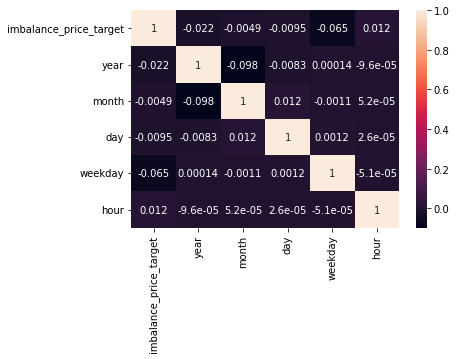

In [10]:
sns.heatmap(bigdata.corr(), annot=True)

### Plots

Text(0.5, 1.0, 'Years')

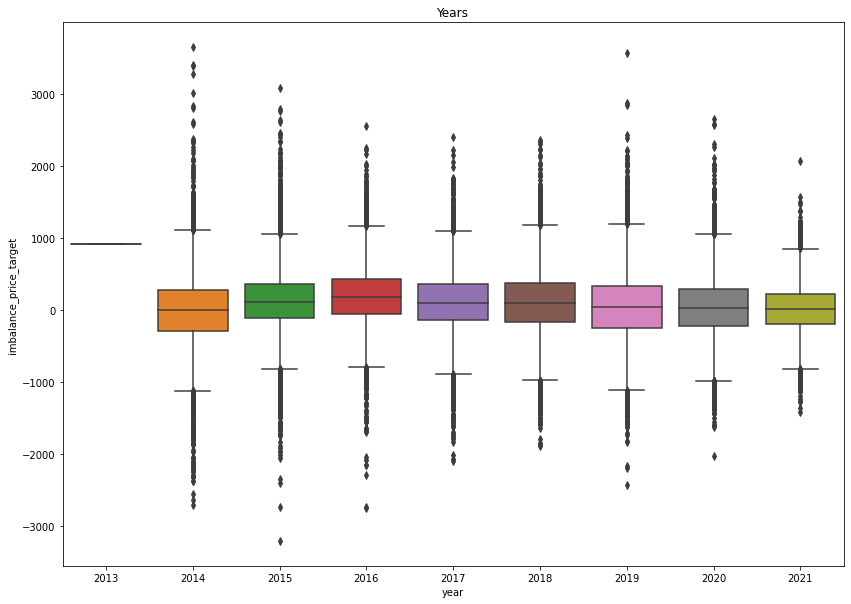

In [70]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['year'], y=bigdata['imbalance_price_target'])
plt.title('Years')

Text(0.5, 1.0, 'Months')

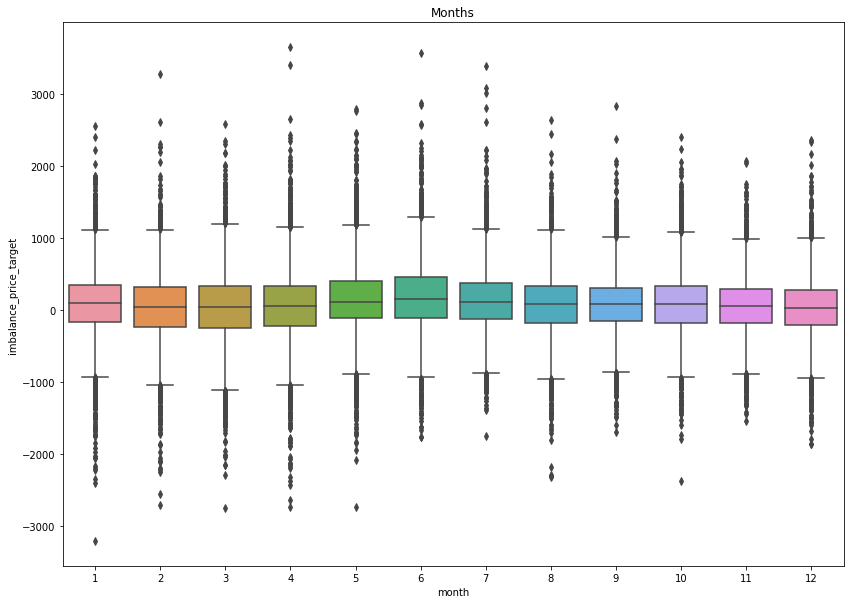

In [68]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['month'], y=bigdata['imbalance_price_target'])
plt.title('Months')

Text(0.5, 1.0, 'Weekdays')

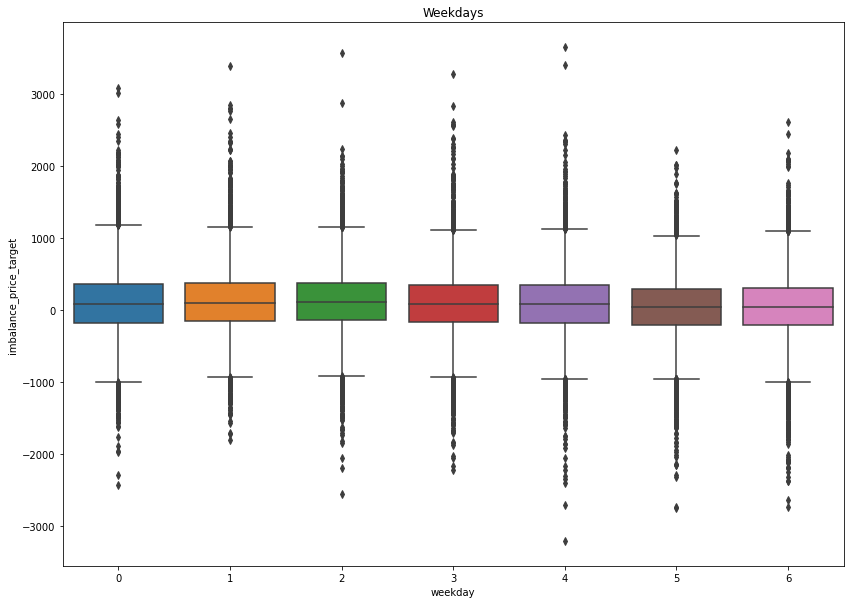

In [69]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['weekday'], y=bigdata['imbalance_price_target'])
plt.title('Weekdays')

Text(0.5, 1.0, 'Hours')

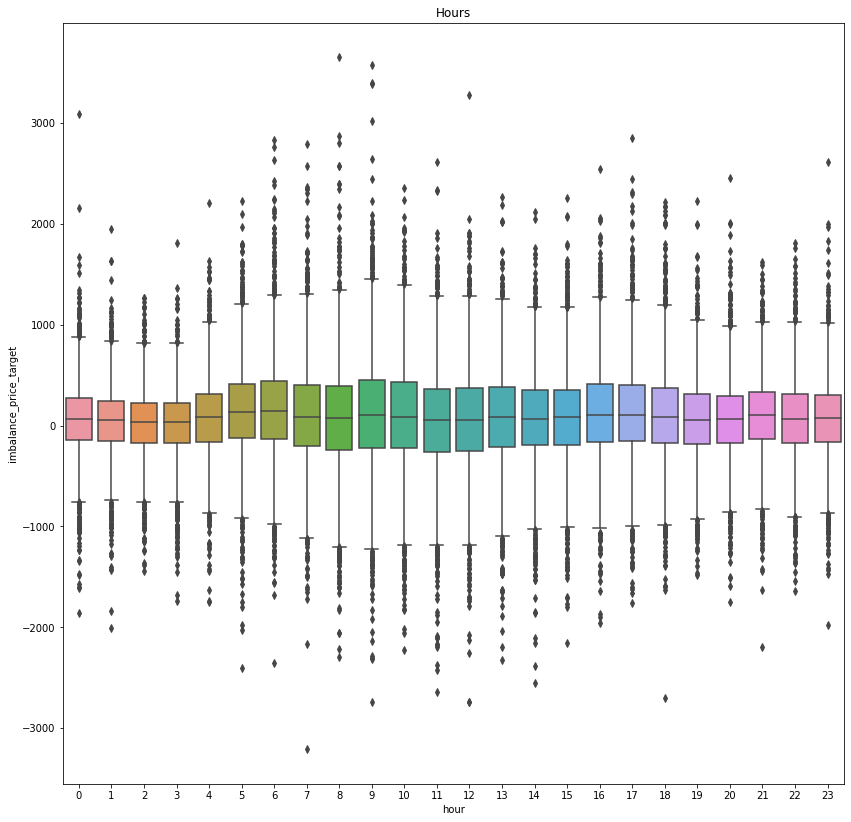

In [77]:
plt.figure(figsize=(14,14))
sns.boxplot(data=bigdata, x=bigdata['hour'], y=bigdata['imbalance_price_target'])
plt.title('Hours')

Text(0.5, 1.0, 'Years')

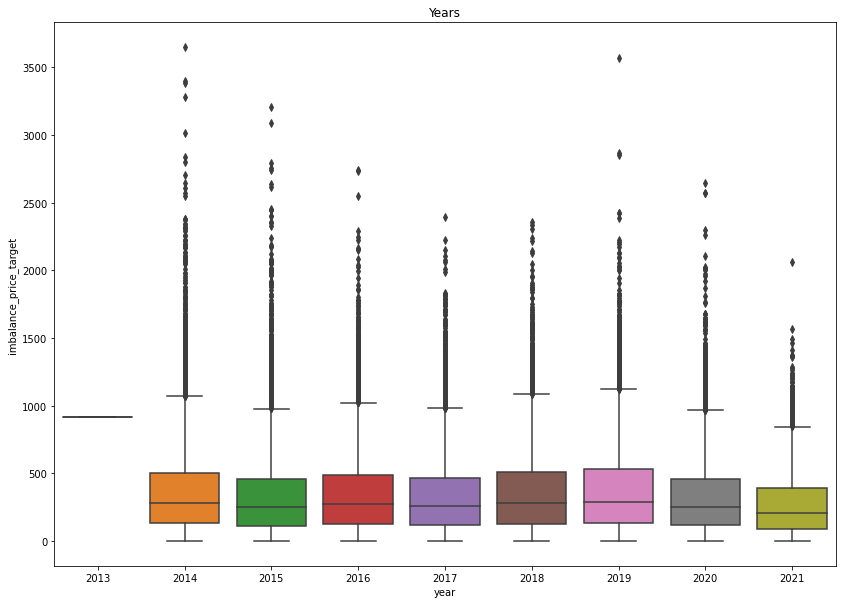

In [72]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['year'], y=np.abs(bigdata['imbalance_price_target']))
plt.title('Years')

Text(0.5, 1.0, 'Months')

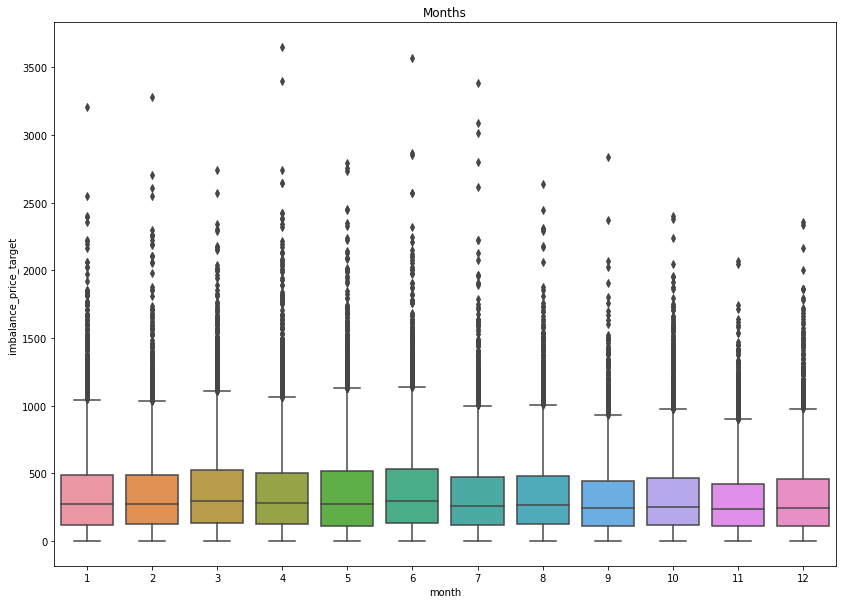

In [73]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['month'], y=np.abs(bigdata['imbalance_price_target']))
plt.title('Months')

Text(0.5, 1.0, 'Weekdays')

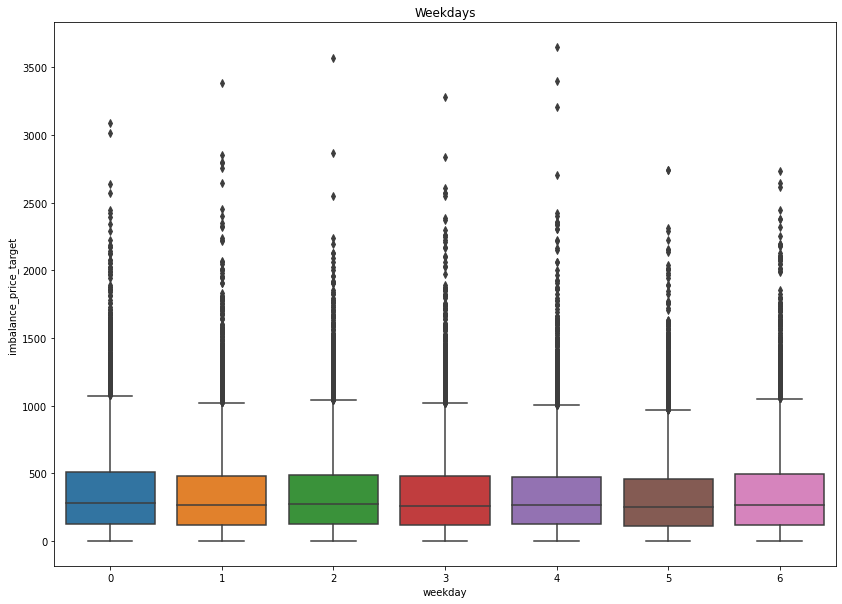

In [74]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['weekday'], y=np.abs(bigdata['imbalance_price_target']))
plt.title('Weekdays')

Text(0.5, 1.0, 'Hours')

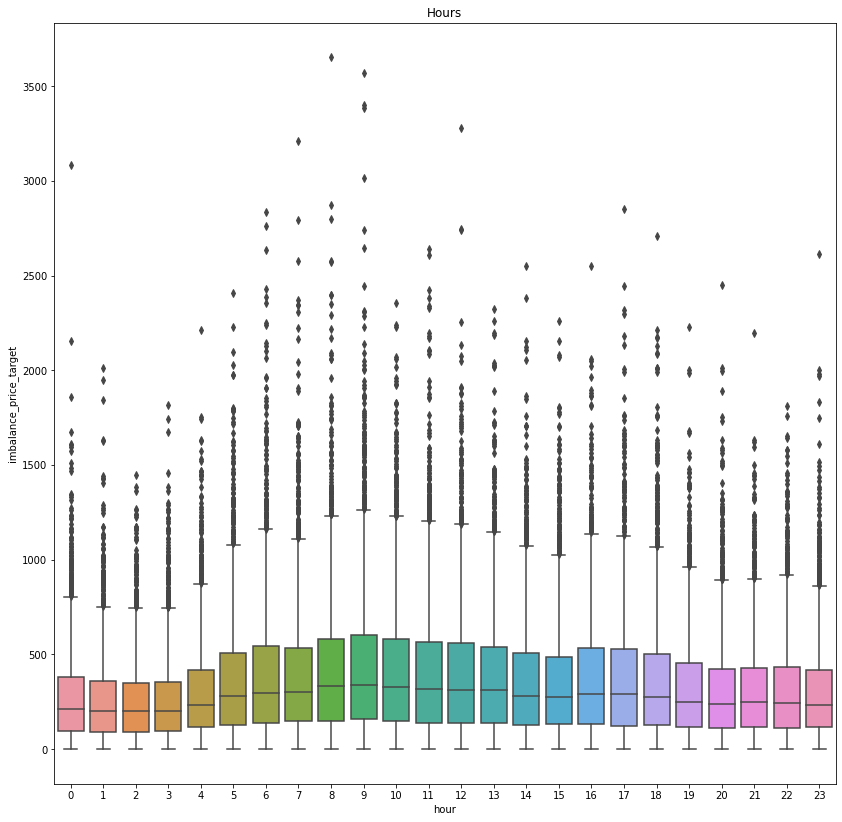

In [76]:
plt.figure(figsize=(14,14))
sns.boxplot(data=bigdata, x=bigdata['hour'], y=np.abs(bigdata['imbalance_price_target']))
plt.title('Hours')

In [13]:
data = pd.read_csv("../data/dataset_merged.csv")

In [14]:
data = data.set_index('dt_start_utc')

In [15]:
data

,windspeed_ms,epex_da_de_eur_mwh,solar_mw_fiftyhertz,solar_mw_tennet,solar_mw_amprion,solar_mw_transnetbw,solar_mw_nrv,fc_da,fc_load_50H,fc_load_DE,...,fc_onshore_DK1,offshore_mw_fiftyhertz,offshore_mw_tennet,offshore_mw_nrv,onshore_mw_fiftyhertz,onshore_mw_tennet,onshore_mw_amprion,onshore_mw_transnetbw,onshore_mw_nrv,imbalance_price_target
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,13.7925,10.07,0.0,0.00,0.0,0.0,0.00,29.730,6150.5,41218.5,...,2342.0,1014.99,4669.35,5684.34,9231.31,11624.89,3039.50,105.45,24001.15,-329.6045
2019-01-01 01:00:00,14.3600,-4.08,0.0,0.00,0.0,0.0,0.00,26.050,6029.0,40139.0,...,2227.0,659.54,4674.65,5334.19,10012.16,12762.32,3576.50,112.04,26463.02,-283.8000
2019-01-01 02:00:00,15.0180,-9.91,0.0,0.00,0.0,0.0,0.00,23.760,6057.0,39917.0,...,2163.0,615.41,4663.13,5278.54,10852.08,13988.91,4094.75,164.29,29100.03,-334.7170
2019-01-01 03:00:00,14.8220,-7.41,0.0,0.00,0.0,0.0,0.00,20.950,6122.5,40282.0,...,2108.0,493.95,4666.95,5160.90,11761.89,14809.73,4685.25,226.52,31483.39,117.6665
2019-01-01 04:00:00,14.5930,-12.55,0.0,0.00,0.0,0.0,0.00,15.770,6152.0,40528.0,...,2142.0,333.78,4668.18,5001.96,13125.93,15131.73,5024.50,315.82,33597.98,-323.3150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:00:00,6.1635,49.92,0.0,0.03,0.0,0.0,0.03,53.555,11108.5,56709.0,...,631.0,128.69,4628.28,4756.97,651.60,3648.29,1620.00,179.00,6098.89,-130.1485
2020-09-30 20:00:00,5.9385,42.79,0.0,0.05,0.0,0.0,0.05,46.200,10454.5,53241.0,...,701.0,140.73,5055.73,5196.46,707.77,3953.82,1977.75,259.00,6898.34,-248.8910
2020-09-30 21:00:00,6.0630,35.02,0.0,0.05,0.0,0.0,0.05,40.030,9635.5,49149.0,...,765.0,174.31,5165.00,5339.31,779.20,3957.25,2123.75,284.25,7144.45,157.6065


### Plots imbalance energy price

#### Monthly distribution

In [78]:
months = bigdata.groupby('month').median()['imbalance_price_target']

In [79]:
months = pd.DataFrame(months)

In [80]:
months.rename(columns={'imbalance_price_target':'imb_price_median'}, inplace=True)

In [81]:
months['imb_price_min'] = bigdata.groupby('month').min()['imbalance_price_target']

In [82]:
months['imb_price_max'] = bigdata.groupby('month').max()['imbalance_price_target']

In [113]:
months['imb_price_abs_median'] = np.abs(bigdata).groupby('month').median()['imbalance_price_target']

In [114]:
months

,imb_price_median,imb_price_min,imb_price_max,imb_price_abs_median
month,,,,
1,89.39300,-3210.3880,2548.2020,270.63000
2,41.44900,-2706.6120,3279.4860,272.05650
3,44.07525,-2744.4200,2574.9400,295.27600
4,57.57425,-2740.6320,3651.6960,277.79600
5,109.13300,-2737.8740,2794.0160,274.27650
6,151.28675,-1769.8715,3571.2205,297.04825
7,107.13900,-1754.3200,3382.8200,259.04200
8,79.58425,-2313.7720,2636.3340,265.49050
9,75.33825,-1701.5915,2835.9280,246.96900


Text(0.5, 1.0, 'Imbalance price - Median')

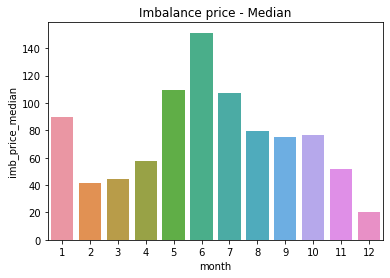

In [84]:
# distribution per month
sns.barplot(data=months, x=months.index, y=months['imb_price_median'])
plt.title('Imbalance price - Median')

Text(0.5, 1.0, 'Imbalance price - Absolute Median')

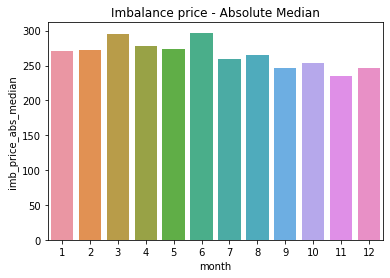

In [115]:
# distribution per month
sns.barplot(data=months, x=months.index, y=months['imb_price_abs_median'])
plt.title('Imbalance price - Absolute Median')

[Text(0, 3, '2548.2'),
 Text(0, 3, '3279.49'),
 Text(0, 3, '2574.94'),
 Text(0, 3, '3651.7'),
 Text(0, 3, '2794.02'),
 Text(0, 3, '3571.22'),
 Text(0, 3, '3382.82'),
 Text(0, 3, '2636.33'),
 Text(0, 3, '2835.93'),
 Text(0, 3, '2399.14'),
 Text(0, 3, '2067.53'),
 Text(0, 3, '2355.75')]

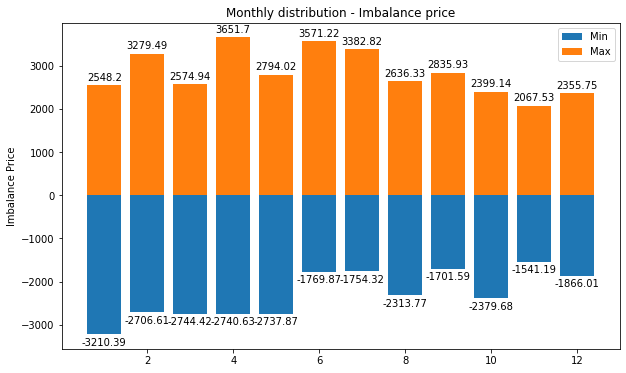

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))
min = ax.bar(months.index, months['imb_price_min'], label='Min')
max = ax.bar(months.index, months['imb_price_max'], label='Max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Imbalance Price')
ax.set_title('Monthly distribution - Imbalance price')
ax.legend()

ax.bar_label(min, padding=3)
ax.bar_label(max, padding=3)

#### Weekday distribution

In [86]:
weekdays = bigdata.groupby('weekday').median()['imbalance_price_target']

In [87]:
weekdays = pd.DataFrame(weekdays)

In [88]:
weekdays.rename(columns={'imbalance_price_target':'imb_price_median'}, inplace=True)

In [89]:
weekdays['imb_price_min'] = bigdata.groupby('weekday').min()['imbalance_price_target']

In [90]:
weekdays['imb_price_max'] = bigdata.groupby('weekday').max()['imbalance_price_target']

In [116]:
weekdays['imb_price_abs_median'] = np.abs(bigdata).groupby('weekday').median()['imbalance_price_target']

In [117]:
weekdays

,imb_price_median,imb_price_min,imb_price_max,imb_price_abs_median
weekday,,,,
0,87.378500,-2425.373,3085.8420,279.68200
1,96.829000,-1811.654,3382.8200,268.37000
2,105.680750,-2550.728,3571.2205,270.62825
3,82.749175,-2226.942,3279.4860,261.80575
4,83.255500,-3210.388,3651.6960,266.72775
5,39.581500,-2744.420,2226.8900,251.06050
6,38.657750,-2737.874,2613.4960,264.21125


Text(0.5, 1.0, 'Imbalance price - Median')

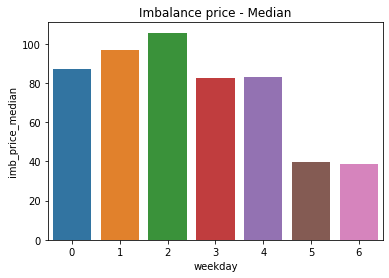

In [118]:
# distribution per month
sns.barplot(data=weekdays, x=weekdays.index, y=weekdays['imb_price_median'])
plt.title('Imbalance price - Median')

Text(0.5, 1.0, 'Imbalance price - Absolute Median')

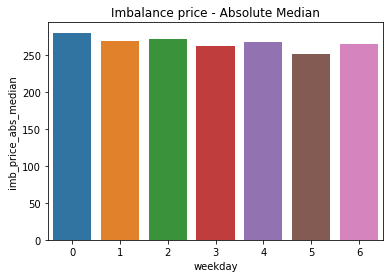

In [119]:
# distribution per month
sns.barplot(data=weekdays, x=weekdays.index, y=weekdays['imb_price_abs_median'])
plt.title('Imbalance price - Absolute Median')

[Text(0, 3, '3085.84'),
 Text(0, 3, '3382.82'),
 Text(0, 3, '3571.22'),
 Text(0, 3, '3279.49'),
 Text(0, 3, '3651.7'),
 Text(0, 3, '2226.89'),
 Text(0, 3, '2613.5')]

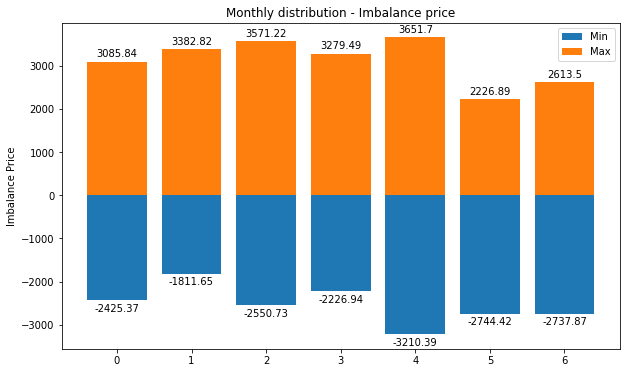

In [93]:
fig, ax = plt.subplots(figsize=(10, 6))
min = ax.bar(weekdays.index, weekdays['imb_price_min'], label='Min')
max = ax.bar(weekdays.index, weekdays['imb_price_max'], label='Max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Imbalance Price')
ax.set_title('Monthly distribution - Imbalance price')
ax.legend()

ax.bar_label(min, padding=3)
ax.bar_label(max, padding=3)

#### Hourly distribution

In [94]:
hours = bigdata.groupby('hour').median()['imbalance_price_target']

In [95]:
hours = pd.DataFrame(hours)

In [96]:
hours.rename(columns={'imbalance_price_target':'imb_price_median'}, inplace=True)

In [97]:
hours['imb_price_min'] = bigdata.groupby('hour').min()['imbalance_price_target']

In [98]:
hours['imb_price_max'] = bigdata.groupby('hour').max()['imbalance_price_target']

In [120]:
hours['imb_price_abs_median'] = np.abs(bigdata).groupby('hour').median()['imbalance_price_target']

In [121]:
hours

,imb_price_median,imb_price_min,imb_price_max,imb_price_abs_median
hour,,,,
0,62.5165,-1856.436,3085.8420,210.6520
1,55.4805,-2012.268,1950.3100,200.4580
2,30.2580,-1445.844,1266.5335,201.0035
3,30.3400,-1740.730,1815.0155,201.4180
4,81.5460,-1755.272,2211.2840,233.2540
5,130.6560,-2405.732,2226.8900,279.2140
6,146.1680,-2354.744,2835.9280,296.3720
7,87.4130,-3210.388,2794.0160,303.4160
8,76.7460,-2292.358,3651.6960,332.2925


Text(0.5, 1.0, 'Imbalance price - Median')

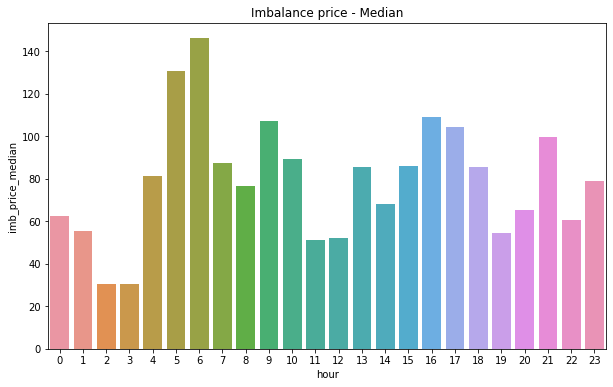

In [125]:
# distribution per hour
plt.figure(figsize=(10, 6))
sns.barplot(data=hours, x=hours.index, y=hours['imb_price_median'])
plt.title('Imbalance price - Median')

Text(0.5, 1.0, 'Imbalance price - Absolute Median')

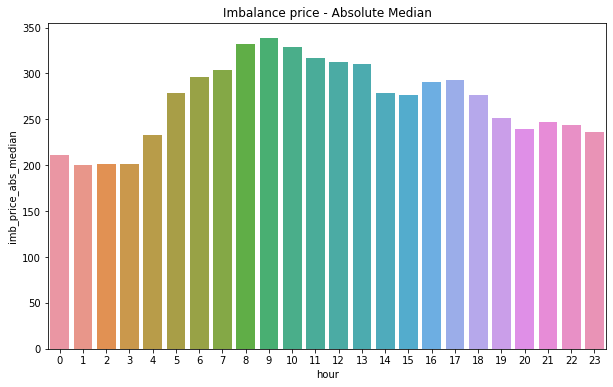

In [126]:
# distribution per hour
plt.figure(figsize=(10, 6))
sns.barplot(data=hours, x=hours.index, y=hours['imb_price_abs_median'])
plt.title('Imbalance price - Absolute Median')

[Text(0, 3, '3085.84'),
 Text(0, 3, '1950.31'),
 Text(0, 3, '1266.53'),
 Text(0, 3, '1815.02'),
 Text(0, 3, '2211.28'),
 Text(0, 3, '2226.89'),
 Text(0, 3, '2835.93'),
 Text(0, 3, '2794.02'),
 Text(0, 3, '3651.7'),
 Text(0, 3, '3571.22'),
 Text(0, 3, '2355.75'),
 Text(0, 3, '2609.35'),
 Text(0, 3, '3279.49'),
 Text(0, 3, '2261.84'),
 Text(0, 3, '2122'),
 Text(0, 3, '2259.1'),
 Text(0, 3, '2548.2'),
 Text(0, 3, '2850.01'),
 Text(0, 3, '2213.91'),
 Text(0, 3, '2226.31'),
 Text(0, 3, '2450.42'),
 Text(0, 3, '1621.01'),
 Text(0, 3, '1812.98'),
 Text(0, 3, '2613.5')]

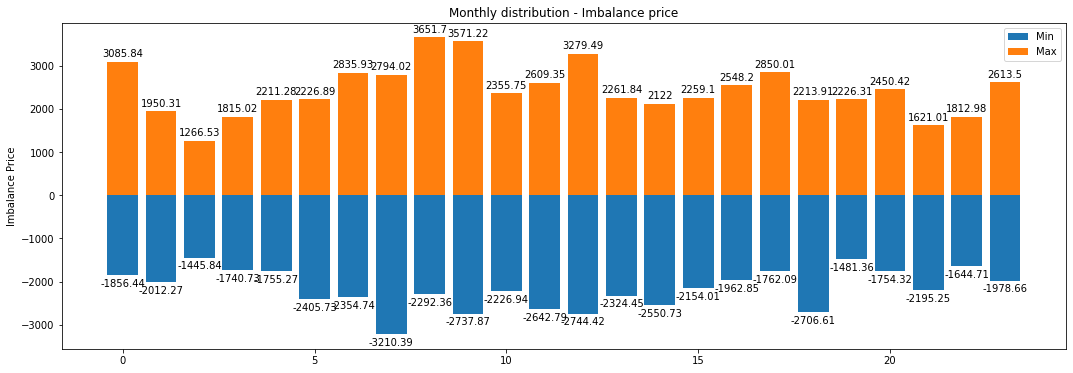

In [104]:
fig, ax = plt.subplots(figsize=(18, 6))
min = ax.bar(hours.index, hours['imb_price_min'], label='Min')
max = ax.bar(hours.index, hours['imb_price_max'], label='Max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Imbalance Price')
ax.set_title('Monthly distribution - Imbalance price')
ax.legend()

ax.bar_label(min, padding=3)
ax.bar_label(max, padding=3)

In [56]:
wind = data['imbalance_price_target']

In [57]:
wind = pd.DataFrame(wind)

In [58]:
wind.head()

,imbalance_price_target
dt_start_utc,
2019-01-01 00:00:00,-329.6045
2019-01-01 01:00:00,-283.8000
2019-01-01 02:00:00,-334.7170
2019-01-01 03:00:00,117.6665
2019-01-01 04:00:00,-323.3150


In [59]:
wind['windspeed_ms'] = data['windspeed_ms']

In [60]:
wind.head()

,imbalance_price_target,windspeed_ms
dt_start_utc,,
2019-01-01 00:00:00,-329.6045,13.7925
2019-01-01 01:00:00,-283.8000,14.3600
2019-01-01 02:00:00,-334.7170,15.0180
2019-01-01 03:00:00,117.6665,14.8220
2019-01-01 04:00:00,-323.3150,14.5930


In [61]:
wind.describe()

,imbalance_price_target,windspeed_ms
count,15336.000000,15336.000000
mean,48.563995,6.758124
std,481.992548,2.905778
min,-2425.373000,0.972500
25%,-240.662500,4.708375
50%,35.710500,6.353750
75%,317.248000,8.371000
max,3571.220500,22.438000


In [62]:
wind['windspeed_0_5'] = wind['windspeed_ms'].apply(lambda x: 1 if x <= 5 else 0)
wind['windspeed_5_10'] = wind['windspeed_ms'].apply(lambda x: 1 if (x > 5 and x <=10) else 0)
wind['windspeed_10_15'] = wind['windspeed_ms'].apply(lambda x: 1 if (x > 10 and x <=15) else 0)
wind['windspeed_15_20'] = wind['windspeed_ms'].apply(lambda x: 1 if (x > 15 and x <=20) else 0)
wind['windspeed_20_25'] = wind['windspeed_ms'].apply(lambda x: 1 if x > 20 else 0)

In [63]:
wind.head()

,imbalance_price_target,windspeed_ms,windspeed_0_5,windspeed_5_10,windspeed_10_15,windspeed_15_20,windspeed_20_25
dt_start_utc,,,,,,,
2019-01-01 00:00:00,-329.6045,13.7925,0,0,1,0,0
2019-01-01 01:00:00,-283.8000,14.3600,0,0,1,0,0
2019-01-01 02:00:00,-334.7170,15.0180,0,0,0,1,0
2019-01-01 03:00:00,117.6665,14.8220,0,0,1,0,0
2019-01-01 04:00:00,-323.3150,14.5930,0,0,1,0,0
